In [1]:
import pandas as pd
import numpy as np

In [2]:
data_xls = pd.read_excel('ccp.xlsx','Customer Conversion Prediction', index_col=None)
data_xls.to_csv('ccp.csv', encoding='utf-8', index=False)

In [3]:
df=pd.read_csv('ccp.csv')

In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [8]:
df.apply(lambda x: len(x.unique()))

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [9]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [10]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education_qual
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

call_type
cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

mon
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

prev_outcome
unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

y
no     39922
yes     5289
Name: y, dtype: int64



In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

<Axes: >

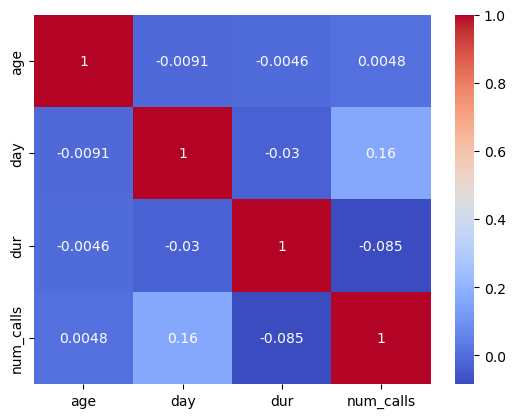

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['job_new']=lb.fit_transform(df['job'])
df['marital_new']=lb.fit_transform(df['marital'])
df['education_qual_new']=lb.fit_transform(df['education_qual'])
df['call_type_new']=lb.fit_transform(df['call_type'])
df['prev_outcome_new']=lb.fit_transform(df['prev_outcome'])
df['y']=lb.fit_transform(df['y'])
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,job_new,marital_new,education_qual_new,call_type_new,prev_outcome_new
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0,4,1,2,2,3
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0,9,2,1,2,3
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0,2,1,1,2,3
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0,1,1,3,2,3
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0,11,2,3,2,3


In [14]:
data = df
data


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,job_new,marital_new,education_qual_new,call_type_new,prev_outcome_new
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0,4,1,2,2,3
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0,9,2,1,2,3
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0,2,1,1,2,3
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0,1,1,3,2,3
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0,11,2,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1,9,1,2,0,3
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1,5,0,0,0,3
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1,5,1,1,0,2
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0,1,1,1,1,3


In [15]:
def mtn(x):
    months = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    a = x.strip()[:3].lower()
    try:
        ez = months[a]
        return (ez)
    except:
        raise ValueError('Not a month')


In [16]:
data['mon'] = data['mon'].apply(mtn)
data.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,job_new,marital_new,education_qual_new,call_type_new,prev_outcome_new
0,58,management,married,tertiary,unknown,5,5,261,1,unknown,0,4,1,2,2,3
1,44,technician,single,secondary,unknown,5,5,151,1,unknown,0,9,2,1,2,3
2,33,entrepreneur,married,secondary,unknown,5,5,76,1,unknown,0,2,1,1,2,3
3,47,blue-collar,married,unknown,unknown,5,5,92,1,unknown,0,1,1,3,2,3
4,33,unknown,single,unknown,unknown,5,5,198,1,unknown,0,11,2,3,2,3
5,35,management,married,tertiary,unknown,5,5,139,1,unknown,0,4,1,2,2,3
6,28,management,single,tertiary,unknown,5,5,217,1,unknown,0,4,2,2,2,3
7,42,entrepreneur,divorced,tertiary,unknown,5,5,380,1,unknown,0,2,0,2,2,3
8,58,retired,married,primary,unknown,5,5,50,1,unknown,0,5,1,0,2,3
9,43,technician,single,secondary,unknown,5,5,55,1,unknown,0,9,2,1,2,3


In [17]:
data.drop(['job','marital','education_qual','call_type','prev_outcome'],axis=1,inplace=True)

In [18]:
data.head()

,age,day,mon,dur,num_calls,y,job_new,marital_new,education_qual_new,call_type_new,prev_outcome_new
0,58,5,5,261,1,0,4,1,2,2,3
1,44,5,5,151,1,0,9,2,1,2,3
2,33,5,5,76,1,0,2,1,1,2,3
3,47,5,5,92,1,0,1,1,3,2,3
4,33,5,5,198,1,0,11,2,3,2,3


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
y=data['y']
X=data.drop(['y'],axis=1)
y
X

,age,day,mon,dur,num_calls,job_new,marital_new,education_qual_new,call_type_new,prev_outcome_new
0,58,5,5,261,1,4,1,2,2,3
1,44,5,5,151,1,9,2,1,2,3
2,33,5,5,76,1,2,1,1,2,3
3,47,5,5,92,1,1,1,3,2,3
4,33,5,5,198,1,11,2,3,2,3
...,...,...,...,...,...,...,...,...,...,...
45206,51,17,11,977,3,9,1,2,0,3
45207,71,17,11,456,2,5,0,0,0,3
45208,72,17,11,1127,5,5,1,1,0,2
45209,57,17,11,508,4,1,1,1,1,3


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=20
)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.08416667501528498
CV Score: 0.0985394562946493


<Axes: title={'center': 'Model Coefficients'}>

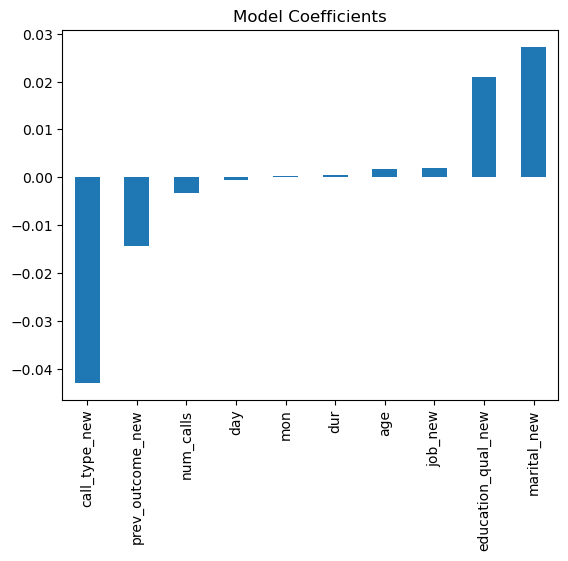

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [24]:
!pip install xgboost

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

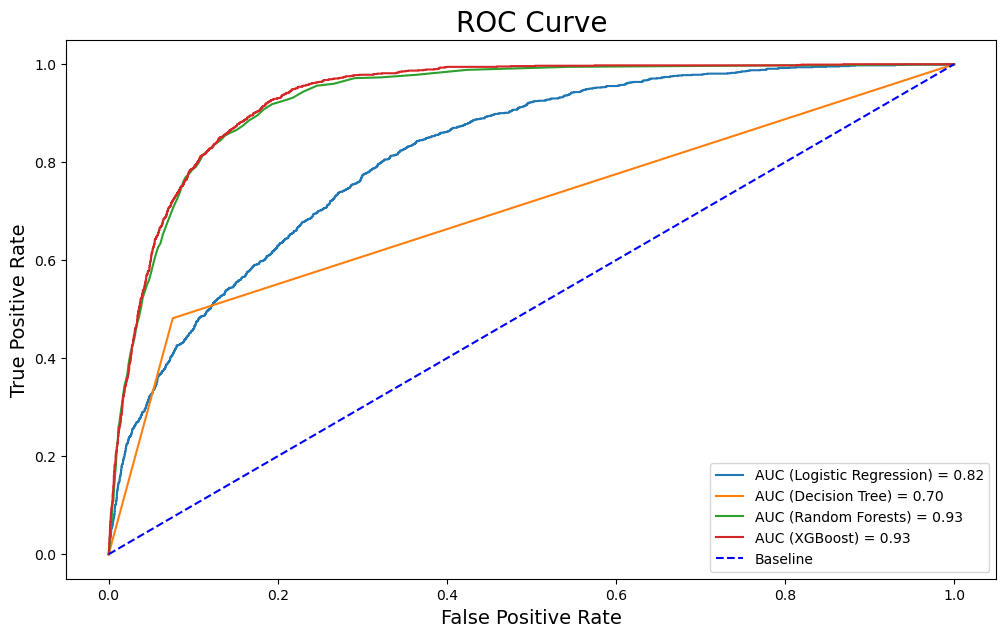

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt = roc_auc_score(y_test_int, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, probs_dt)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_xg = roc_auc_score(y_test_int, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, probs_xg)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();